In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

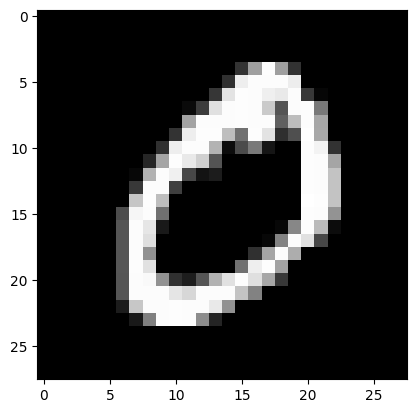

In [4]:
plt.imshow(x_train[1],cmap='gray')
plt.show()

In [5]:
print(x_train[1])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [6]:
#Shape of all 
print("x_train Shape:",x_train.shape);
print("Y_train Shape:",y_train.shape);
print("x_test Shape:",x_test.shape);
print("Y_test Shape:",y_test.shape);

x_train Shape: (60000, 28, 28)
Y_train Shape: (60000,)
x_test Shape: (10000, 28, 28)
Y_test Shape: (10000,)


In [7]:
x_train = x_train.reshape(60000,784).astype('float')/255
x_test = x_test.reshape(10000,784).astype('float')/255

In [8]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
model = Sequential();

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))   
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [14]:
batch_size = 128 
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2742 - accuracy: 0.9206 - val_loss: 0.1283 - val_accuracy: 0.9638
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1190 - accuracy: 0.9645 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.0670 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0645 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0616 - val_accuracy: 0.9815
Epoch 

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0646999403834343
Test accuracy: 0.9843000173568726
